# Predicting Diabetes

1. Ask the right question
2. Prepare the data
3. Selecting the Algorithm 
4. Training the model 
5. Testing the model

## Question

Solution Statement: "Use the Machine Learning Workflow to
process and transform Pima Indian Data to create a prediction
model. This model must predict which people are likely to
develop diabetes with 70% or greater accuracy"


## Import Statements

In [2]:
import pandas as pd             # pandas is a dataframe library
import matplotlib.pyplot as plt # matplotlib.pyplot plots data
import numpy as np              # numpy provides N-dim object support

# do ploting inline instead of in a sperate window
%matplotlib inline

## Load, review and prepare the data

In [3]:
# Load Prima data - adjust path as necessary
# Change location to your data location
df = pd.read_csv("C:/YOUR DATA LOCATION/data/pima-data.csv")

In [4]:
# Check shape of the data using the shape function
df.shape

(768, 10)

In [5]:
# Inspect the start of the dataframe using the head function
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [6]:
# Inspect the end of the dataframe using the end function
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [7]:
# Check for null values
df.isnull().values.any()

False

In [8]:
# Check for correlated features using a cross plot
def plot_corr(df, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe
    
    Input: 
        df: pandas DataFrame
        size: vertical and horizontal size of the plot
    
    Displays:
        matrix of correlation between columns. Blue-cyan-yellow-red-darkred => less to more correlated
                                               0 -----------------> 1
                                               Expect a darkred line running from top left to bottom right
    """
    
    corr = df.corr()     #data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)     # colour code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns) # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns) # draw y tick marks

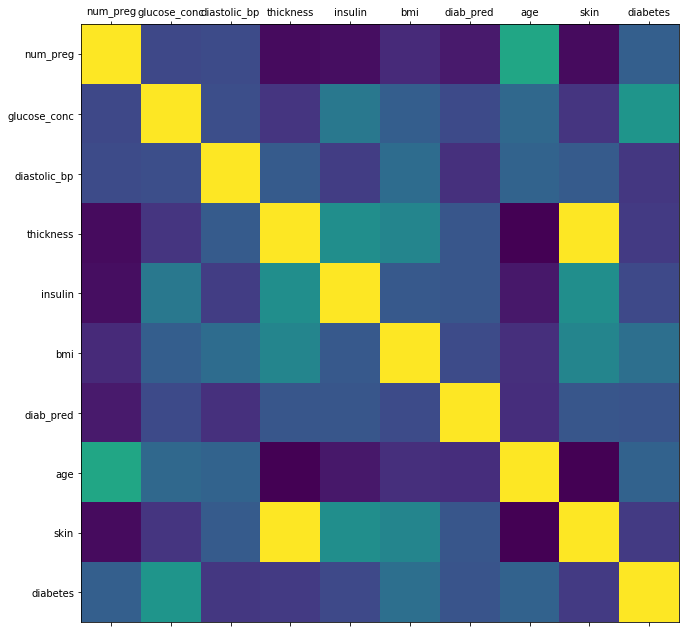

In [9]:
# Invoke the correlation cross plot
plot_corr(df)

In [10]:
# Check how correlated the Skin and Thickness columns because of indiactions in the cross plot matrix
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [11]:
# Drop the skin column as it adds no value
del df['skin']

In [12]:
#check the skin column has been removed
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


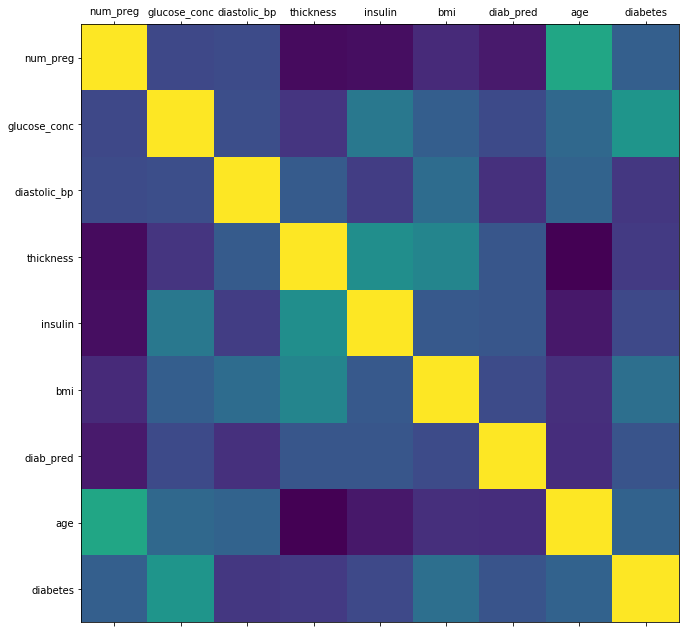

In [13]:
#Rechack the Plot that the correlation has been removed
plot_corr(df)

In [14]:
# Molding the data by adjusting the data types and create new columns if needed
# First check the data types
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [15]:
# We need to change True to 1 and False to 0
# First we need to define a mapping dictionary 
diabetes_map = {True : 1, False : 0}

In [16]:
# Now we use a map method to change the values
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [17]:
# Now check the table again with the head function
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
# Check the true/false ratio
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])
print("Number of True cases: {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) * 100))

Number of True cases: 268 (34.90%)
Number of False cases: 500 (65.10%)


## Select the Algorithm

SciKitLean library contains over 50 algorithms 
Algorithm Decison Factors - Learning Type, Result Type, Complexity, Basic vs Enhanced

Learning Type = Prediction Model (Supervised Machine Learning)
Results Type = Binary Classification (Discrete Values)
Compelexity = Simple Single Algorithm (non-ensemble algorithms) 
Basic vs Enhanced = Basic

Candidate Algorithm Options
1. Naive Bayes
2. Logistic Regression
3. Decision Tree

We will use Naive Bayes as our initial algorithm because it is fast, simple and stable

## Train the Model

In [30]:
# Split the data 70% Training and 30% Testing
from sklearn.model_selection import train_test_split

feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

x = df[feature_col_names].values # predictor feature columns (8 x m)
y = df[predicted_class_names].values # predicted class (1 x m)
split_test_size = 0.30

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=42)
# test_size = 0.3 is 30%, 42 is the answer to everything


In [23]:
print("{0:0.2f}% in training set".format((len(x_train)/len(df.index)) * 100)) 
print("{0:0.2f}% in test set".format((len(x_test)/len(df.index)) * 100)) 

69.92% in training set
30.08% in test set


In [24]:
# verify predicted value was split correctly
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), (len(df.loc[df['diabetes'] == 1])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), (len(df.loc[df['diabetes'] == 0])/len(df.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))


Original True  : 268 (34.90%)
Original False : 500 (65.10%)

Training True  : 188 (35.01%)
Training False : 349 (64.99%)

Test True      : 80 (34.63%)
Test False     : 151 (65.37%)


In [25]:
# Post Split Data Preparation
# Check for hidden missing values in the data set
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
# It appears that '0' was entered for into the data set for missing values
# as it is impossible for somebody to have '0' thickness skin! 
# This means we will now need to check how many rows have unexpected '0' values
print("# rows in dataframe {0}".format(len(df)))
print("# rows missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# rows missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# rows missing thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# rows missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# rows missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# rows missing diab_pred: {0}".format(len(df.loc[df['diab_pred'] == 0])))
print("# rows missing age: {0}".format(len(df.loc[df['age'] == 0])))


# rows in dataframe 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


In [27]:
# Without Domain Medical knowledge we do not know which of these are valid nulls or reasonable real data
# The best option then is to impute with the Mean Value for all '0' values instead
from sklearn.preprocessing import Imputer 

fill_0 = Imputer(missing_values=0, strategy="mean", axis=0)

x_train = fill_0.fit_transform(x_train)
x_test = fill_0.fit_transform(x_test)

In [29]:
# Training Initial Algorithm - Naive Bayes
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

# call the fit method to create a model trained with the training data
nb_model.fit(x_train, y_train.ravel())


GaussianNB(priors=None)

## Test the Model

### Performance on the Training Data

In [35]:
# predict values using the training data
nb_predict_train = nb_model.predict(x_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))

Accuracy: 0.7356


### Performance on the Test Data

In [36]:
# predict values using the testing data
nb_predict_test = nb_model.predict(x_test)

from sklearn import metrics

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))

Accuracy: 0.7186


#### Get Metrics using Confusion Matrix and Classification Report

In [38]:
# Create a Confusion Matrix
# Output will be:
# TRUE NEGATIVE  | FALSE POSITIVE
# FALSE NEGATIVE| TRUE POSITIVE

print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")

# Create a Report
print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

Confusion Matrix
[[126  25]
 [ 40  40]]

Classification Report
             precision    recall  f1-score   support

          0       0.76      0.83      0.79       151
          1       0.62      0.50      0.55        80

avg / total       0.71      0.72      0.71       231



### Performance Improvement Options
1. Adjust current algorithm
2. Get more data or improve data
3. Improve training
4. Switch algorithms

### Lets try the Random Forest Algorithm
- Ensemble Alorithm
- Fits multiple trees with subsets of data
- Averages tree results to improve performance and control overfitting

In [40]:
# import the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Create random forest object
rf_model = RandomForestClassifier(random_state=42)

#Train the Model
rf_model.fit(x_train, y_train.ravel()) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

### Performance on the Training Data

In [42]:
rf_predict_train = rf_model.predict(x_train)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_train)))

Accuracy: 0.9888


### Performance on the Test Data

In [43]:
rf_predict_test = rf_model.predict(x_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))

Accuracy: 0.7403


In [44]:
# Create a Confusion Matrix
# Output will be:
# TRUE NEGATIVE  | FALSE POSITIVE
# FALSE NEGATIVE| TRUE POSITIVE

print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, rf_predict_test) )
print("")

print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

Confusion Matrix
[[123  28]
 [ 32  48]]

Classification Report
             precision    recall  f1-score   support

          0       0.79      0.81      0.80       151
          1       0.63      0.60      0.62        80

avg / total       0.74      0.74      0.74       231



The report above is showing us the the model is overfitted on the training data
We can address this by using a Regularization hyperparameter and/or Cross Validation
This trade off between accuracy in Training data and accuracy in Testing/Real World data 
is the Bias - variance trade off
We can also try another algorithm and see if gives a better result

## Logistic Regression Algorithm

In [45]:
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

# Create Logistic Regression object
lr_model =LogisticRegression(C=0.7, random_state=42)

#Train the Model
lr_model.fit(x_train, y_train.ravel())

lr_predict_test = lr_model.predict(x_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

Accuracy: 0.7619
[[128  23]
 [ 32  48]]

Classification Report
             precision    recall  f1-score   support

          0       0.80      0.85      0.82       151
          1       0.68      0.60      0.64        80

avg / total       0.76      0.76      0.76       231



#### Setting Regularization Parameter

1st max value of 0.625 occured at C=1.100


Text(0,0.5,'recall score')

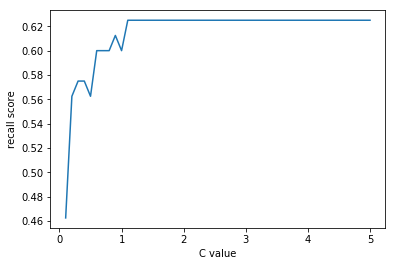

In [47]:
# Exceute the loop to find the best value of C
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42)
    lr_model_loop.fit(x_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(x_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

### Unbalanced Classes
It looks like we also have Unbalanced Classes
This means we have more of one class than others
Our data - 65% No Diabetes, 35% Diabetes
This can cause biases estimation yielding poor prediction results

1st max value of 0.800 occured at C=0.200


Text(0,0.5,'recall score')

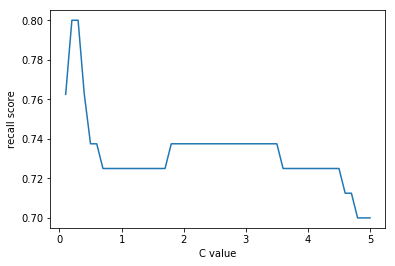

In [48]:
# Exceute the loop again to find the best value of C
# This time we add the class_weight="balanced"
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=42)
    lr_model_loop.fit(x_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(x_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

In [50]:
# Now we do the Logistic Regression again with two changes
# We set the C value to the best score from the loop above - C=0.200
# We include the class_weight="balanced" parameter

# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

# Create Logistic Regression object with new parameters 
lr_model =LogisticRegression( class_weight="balanced", C=best_score_C_val, random_state=42)

#Train the Model
lr_model.fit(x_train, y_train.ravel())

lr_predict_test = lr_model.predict(x_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))
print(metrics.recall_score(y_test, lr_predict_test))

Accuracy: 0.7359
[[106  45]
 [ 16  64]]

Classification Report
             precision    recall  f1-score   support

          0       0.87      0.70      0.78       151
          1       0.59      0.80      0.68        80

avg / total       0.77      0.74      0.74       231

0.8


### K-fold Cross Validation
Algorithm CV Variants ends in "CV"
Exposes fit(), predict(), ...
Runs the algorithm K times
Can be used like a normal algorithm

In [52]:
# Import LogisticRegressionCV
from sklearn.linear_model import LogisticRegressionCV

# Create object with new parameters 
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced")  # set number of jobs to -1 which uses all cores to parallelize

#Train the Model
lr_cv_model.fit(x_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=-1, penalty='l2', random_state=42,
           refit=False, scoring=None, solver='lbfgs', tol=0.0001,
           verbose=0)

### Predict on Test data

In [59]:
lr_cv_predict_test = lr_cv_model.predict(x_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test))

Accuracy: 0.6970
[[106  45]
 [ 25  55]]

Classification Report
             precision    recall  f1-score   support

          0       0.81      0.70      0.75       151
          1       0.55      0.69      0.61        80

avg / total       0.72      0.70      0.70       231



# Using the trained Model

## Save trained model to file

In [56]:
# Change location to your data location
from sklearn.externals import joblib  
joblib.dump(lr_cv_model, "C:/YOUR DATA LOCATION/data/pima-trained-model.pkl")

['C:/pluralsight/MachineLearningWithPython/Notebooks/data/pima-trained-model.pkl']

In [57]:
lr_cv_model = joblib.load("C:/YOUR DATA LOCATION/data/pima-trained-model.pkl")

## Test Prediction on data

Once the model is loaded we can use it to predict on some data.  In this case the data file contains a few rows from the original Pima CSV file.

In [60]:
# get data from truncated pima data file
df_predict = pd.read_csv("C:/YOUR DATA LOCATION/data/pima-data-trunc.csv")
print(df_predict.shape)


(4, 10)


In [61]:
df_predict

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,1,89,66,23,94,28.1,0.167,21,0.9062,False
1,2,197,70,45,543,30.5,0.158,53,1.7730,True
2,7,100,0,0,0,30.0,0.484,32,0.0000,True
3,1,103,30,38,83,43.3,0.183,33,1.4972,False


The truncated file contained 4 rows from the original CSV.

Data is the same is in same format as the original CSV file's data.  Therefore, just like the original data, we need to transform it before we can make predictions on the data.  

Note: If the data had been previously "cleaned up" this would not be necessary.

We do this by executed the same transformations as we did to the original data

Start by dropping the "skin" which is the same as thickness, with different units.

In [62]:
del df_predict['skin']
df_predict

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,1,89,66,23,94,28.1,0.167,21,False
1,2,197,70,45,543,30.5,0.158,53,True
2,7,100,0,0,0,30.0,0.484,32,True
3,1,103,30,38,83,43.3,0.183,33,False


We need to drop the diabetes column since that is what we are predicting.  
Store data without the column with the prefix x as we did with the x_train and x_test to indicate that it contains only the columns we are prediction.

In [63]:
x_predict = df_predict
del x_predict['diabetes']

Data has 0 in places it should not.

Just like test or test datasets we will use imputation to fix this.

In [64]:
#Impute with mean all 0 readings
fill_0 = Imputer(missing_values=0, strategy="mean", axis=0)
x_predict = fill_0.fit_transform(x_predict)


At this point our data is ready to be used for prediction.  

## Predict diabetes with the prediction data.  Returns 1 if True, 0 if false

In [67]:
lr_cv_model.predict(x_predict)

array([0, 1, 0, 0], dtype=int64)